# 2 Phase Relative Permeability correlations

### Example 1: Wyllie and Gardner method

Generate the drainage relative permeability data for an $ unconsolidated$ $well-sorted sand.$Assume the following critical saturation values


> Soc =0.3,  Swc=0.25, Sgc=0.05

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sw = np.linspace(0.25,0.7,100) # saturation of water
Swc = 0.25 # saturation of water cut
Soc = 0.3 # saturation of oil cut
Sgc = 0.05 # saturation of gas cut

In [3]:
df_wg = pd.DataFrame(data=sw, columns=['Sw'])

$S_w* = \frac {S_w -S_{wc}}{1-S_{wc}}$

$K_{ro} = {(1 -S_w*)}^{3}$

$K_{rw} = {(S_w*)}^{3}$

In [8]:
df_wg['Sw*'] = (df_wg['Sw']-Swc)/(1-Swc)

df_wg['Kro'] = (1- df_wg['Sw*'])**3 # relative perm of oil

df_wg['Krw'] = df_wg['Sw*']**3 # relative perm of water

In [7]:
df_wg

,Sw,Sw*,Kro,Krw
0,0.250000,0.000000,1.000000,0.000000e+00
1,0.254545,0.006061,0.981928,2.226118e-07
2,0.259091,0.012121,0.964075,1.780894e-06
3,0.263636,0.018182,0.946440,6.010518e-06
4,0.268182,0.024242,0.929022,1.424715e-05
...,...,...,...,...
95,0.681818,0.575758,0.076356,1.908618e-01
96,0.686364,0.581818,0.073130,1.969527e-01
97,0.690909,0.587879,0.069996,2.031718e-01
98,0.695455,0.593939,0.066953,2.095204e-01


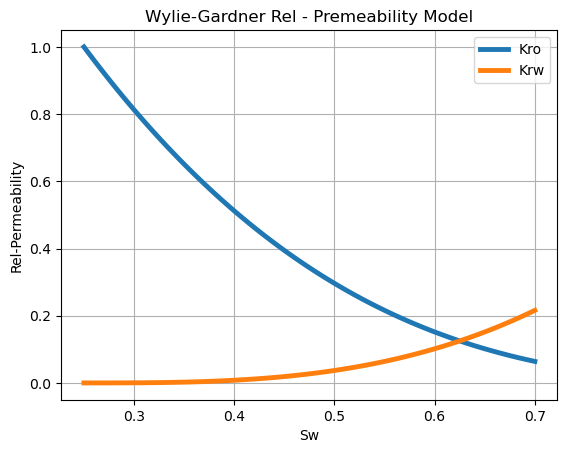

In [9]:
plt.style.use('default')

plt.plot(df_wg['Sw'], df_wg['Kro'], lw=3.5, label='Kro')
plt.plot(df_wg['Sw'], df_wg['Krw'], lw=3.5, label='Krw')

plt.xlabel("Sw")
plt.ylabel("Rel-Permeability")
plt.title('Wylie-Gardner Rel - Premeability Model')

plt.legend()
plt.grid()
plt.show()

### Example 2: Pirson's Correlation

In [10]:
df_p = pd.DataFrame(data=sw, columns=['Sw'])

$S_w*  = \frac {S_w-S_{wc}}{1-S_{wc}}$

$ K_{rw} = \sqrt{S_w*} {S_w}^{3}$

$K_{ro} = (1-S_w*)\sqrt{1-{S_w*}^{0.25}}\sqrt{S_w}$

In [11]:
df_p['Sw*'] = (df_p['Sw'] - Swc)/(1-Swc)

df_p['Krw'] = np.sqrt(df_p['Sw*'])*df_p['Sw']**3

df_p['Kro'] = (1-df_p['Sw*'])*np.sqrt(1-(df_p['Sw*']**0.25)*np.sqrt(df_p['Sw']))

In [12]:
df_p

,Sw,Sw*,Krw,Kro
0,0.250000,0.000000,0.000000,1.000000
1,0.254545,0.006061,0.001284,0.921328
2,0.259091,0.012121,0.001915,0.900600
3,0.263636,0.018182,0.002471,0.884430
4,0.268182,0.024242,0.003003,0.870372
...,...,...,...,...
95,0.681818,0.575758,0.240506,0.224779
96,0.686364,0.581818,0.246636,0.219870
97,0.690909,0.587879,0.252875,0.215002
98,0.695455,0.593939,0.259225,0.210173


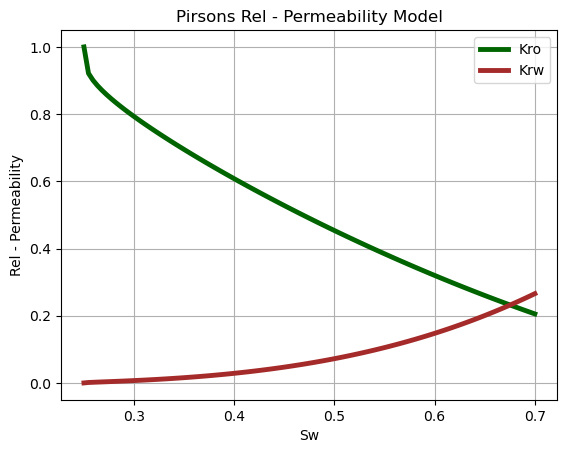

In [15]:
plt.style.use('default')

plt.plot(df_p['Sw'], df_p['Kro'], lw=3.5, label='Kro', color='darkgreen')
plt.plot(df_p['Sw'], df_p['Krw'], lw=3.5, label='Krw', color='brown')

plt.xlabel('Sw')
plt.ylabel('Rel - Permeability')
plt.title('Pirsons Rel - Permeability Model')

plt.legend()
plt.grid()
plt.show()


### Example 3: Corey's Model

> Use Corey's approximation to generate the gas-oil relative permeability for a formation with a connate water saturation of 0.25

In [17]:
sg = np.linspace(0.05,0.7,100) # gas saturation

swc = 0.25  # connate water saturation



In [18]:
sg_star = sg/(1-swc)

kro = (1-sg_star)**4 # rel perm of oil

krg = sg_star**3 * (2-sg_star) # rel perm of gas

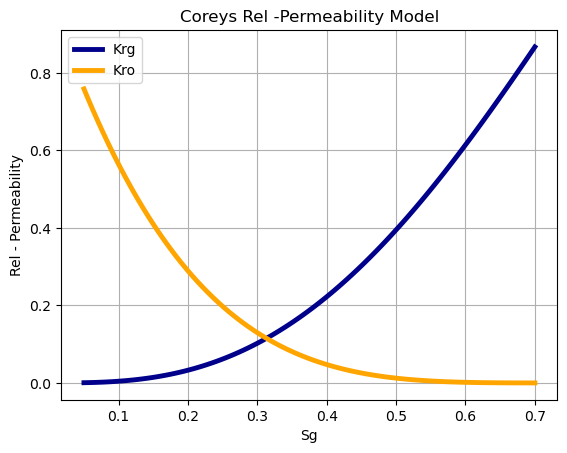

In [24]:
plt.style.use('default')

plt.plot(sg, krg, label='Krg', lw=3.5, color ='darkblue')
plt.plot(sg, kro, label='Kro', lw=3.5, color='orange')

plt.xlabel('Sg')
plt.ylabel("Rel - Permeability")
plt.title('Coreys Rel -Permeability Model')

plt.legend()
plt.grid()
plt.show()